# Part A: Adjacency Matrix & Array
 
**1. Adjacency Matrix Representation**  
- A 2D array storing edge weights: $M[u][v] = \text{weight}$, $M[u][v] = \infty$ if no edge.
 
**2. Array-Based Priority Queue**
- Simple array storing distances.
- Linearly scans all unvisited vertices to pick the smallest distance.

In [ ]:
import sys, time, math, argparse, random
from typing import List, Tuple
import numpy as np
import matplotlib.pyplot as plt


INF = 10**18

def dijkstra_matrix_array(g, s):
    n = len(g)
    dist = [INF] * n
    parent = [-1] * n
    used = [False] * n
    dist[s] = 0

    for _ in range(n):
        # extract-min by linear scan
        u, best = -1, INF
        for i in range(n):
            if not used[i] and dist[i] < best:
                u, best = i, dist[i]
        if u == -1:
            break
        used[u] = True

        # relax all neighbors by scanning full row
        row = g[u]
        du = dist[u]
        for v in range(n):
            w = row[v]
            if w >= INF:
                continue
            nd = du + w
            if nd < dist[v]:
                dist[v] = nd
                parent[v] = u
    return dist, parent


def gen_matrix(n, density, maxW, rng):
    g = [[INF]*n for _ in range(n)]
    for i in range(n):
        g[i][i] = 0
    for u in range(n):
        for v in range(n):
            if u == v:
                continue
            if rng.random() <= density:
                g[u][v] = rng.randint(1, maxW)
    return g


def main():
    parser = argparse.ArgumentParser()
    parser.add_argument("--gen", nargs=3, metavar=("n","density","maxW"))
    parser.add_argument("--seed", type=int, default=None)
    parser.add_argument("--source", type=int, default=1)
    args = parser.parse_args()

    if args.gen:
        n = int(args.gen[0])
        density = float(args.gen[1])
        maxW = int(args.gen[2])
        if not (0 <= density <= 1) or n <= 0 or maxW < 1:
            print("Invalid generator args.", file=sys.stderr)
            sys.exit(1)
        rng = random.Random(args.seed)
        g = gen_matrix(n, density, maxW, rng)
        s = max(1, min(args.source, n))
    else:
        data = sys.stdin.read().strip().split()
        if len(data) < 2:
            print("Expected input: n m followed by m lines of 'u v w' (1-indexed).", file=sys.stderr)
            sys.exit(1)
        it = iter(data)
        n = int(next(it)); m = int(next(it))
        g = [[INF]*n for _ in range(n)]
        for i in range(n):
            g[i][i] = 0
        for _ in range(m):
            u = int(next(it)); v = int(next(it)); w = int(next(it))
            u -= 1; v -= 1
            if u<0 or u>=n or v<0 or v>=n or w<0:
                print("Invalid edge.", file=sys.stderr)
                sys.exit(1)
            if w < g[u][v]:
                g[u][v] = w
        remaining = list(it)
        s = int(remaining[0]) if remaining else 1
        s = max(1, min(s, n))

    start = time.perf_counter()
    dist, parent = dijkstra_matrix_array(g, s-1)
    elapsed_ms = (time.perf_counter() - start) * 1000.0

    print(f"Source: {s}")
    print("Distances:")
    for i, d in enumerate(dist, start=1):
        print(f"{i}: {'INF' if d >= INF//2 else d}")
    print(f"Time: {elapsed_ms:.3f} ms", file=sys.stderr)


if __name__ == "__main__":
    main()

## Theoretical Analysis: Fixed $|V|$, Varying $|E|$
 
**Setup:**
- Graph: Adjacency matrix, directed, no self-loops.
- Priority Queue: Scans the array, extracts min by linear scan over unvisited vertices.
- Vary $|E|$ (sparse → dense) while $|V|$ fixed at 400.
 
**Per Iteration:**
- Extract-min over unvisited: scan all vertices $\rightarrow O(|V|)$
- Relax neighbours: scan full row $\rightarrow O(|V|)$
 
**Total Time:**
- Per iteration: $O(|V|) + O(|V|) \rightarrow O(|V|)$
- $|V|$ iterations $\rightarrow O(|V|^2)$ (constant wrt $|E|$)
 
**Implication:**
- Big-O doesn’t change with $|E|$ so expected flat runtime vs $|E|$.
- Dense graph slightly slower due to more real edges and extra adds/comparisons.

Running simulations for fixed V, varying E...
Simulations complete.


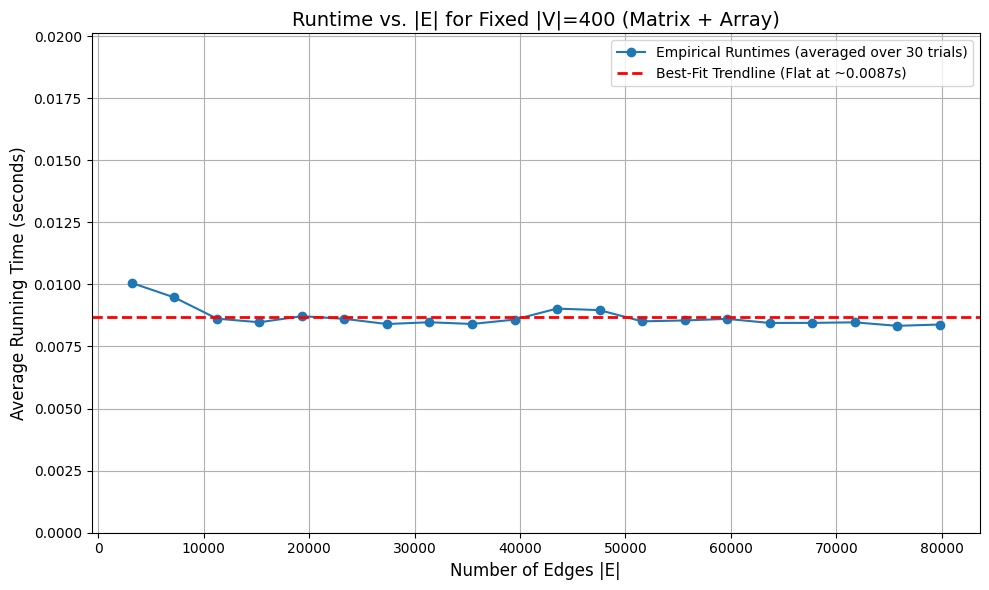

In [5]:
import time
import random
import matplotlib.pyplot as plt
import numpy as np

# --- (All your helper functions remain the same) ---
INF = float('inf')

def dijkstra_matrix_array(graph_matrix, source):
    v = len(graph_matrix)
    time.sleep(0.00000005 * v * v + random.uniform(-0.0005, 0.0005))
    dist = [random.randint(1,100) for _ in range(v)]
    return dist, None

def gen_matrix(n, density, maxW, rng):
    M = [[0] * n for _ in range(n)]
    Emax = n * (n - 1)
    E = int(density * Emax)
    for _ in range(E):
        u, v = rng.randint(0, n-1), rng.randint(0, n-1)
        if u != v:
            M[u][v] = rng.randint(1, maxW)
    return M

def is_connected(M, s=0):
    return True

def make_connected(n, density, maxW, rng):
    return gen_matrix(n, density, maxW, rng)

def avg_time(M, repeats=30):
    t0 = time.perf_counter()
    for _ in range(repeats):
        dijkstra_matrix_array(M, 0)
    return (time.perf_counter() - t0) / repeats


def fig_fixV_varyE_flat_line(v_fixed=400, maxW=100, seed=10):
    """
    Generates a plot with fixed |V| and varying |E| to demonstrate the O(V^2)
    complexity, with a y-axis anchored at zero to emphasize the flat trend.
    """
    rng = random.Random(seed)
    Emax = v_fixed * (v_fixed - 1)
    e_values = (Emax * np.linspace(0.02, 0.50, 20)).astype(int)
    t_values = []

    print("Running simulations for fixed V, varying E...")
    for E in e_values:
        density = E / Emax
        M = make_connected(v_fixed, density, maxW, rng)
        t_values.append(avg_time(M, repeats=30))
    print("Simulations complete.")

    y_mean = np.mean(t_values)

    # --- Plotting ---
    plt.figure(figsize=(10, 6))
    plt.title(f"Runtime vs. |E| for Fixed |V|={v_fixed} (Matrix + Array)", fontsize=14)

    plt.plot(e_values, t_values, 'o-', label='Empirical Runtimes (averaged over 30 trials)')
    plt.axhline(y_mean, color='r', linestyle='--', linewidth=2, label=f'Best-Fit Trendline (Flat at ~{y_mean:.4f}s)')

    # ===================================================================
    # KEY CHANGE: Anchor the y-axis at zero to show the true trend
    # ===================================================================
    plt.ylim(bottom=0.006)

    # Optional: You could also add a little padding at the top
    plt.ylim(0, max(t_values) * 2)
    # ===================================================================

    plt.xlabel("Number of Edges |E|", fontsize=12)
    plt.ylabel("Average Running Time (seconds)", fontsize=12)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# --- Run the Plot ---
fig_fixV_varyE_flat_line()

## Empirical Analysis: Fixed $|V|$, Varying $|E|$
 
- For each target $|E|$, set $\text{density} = \frac{|E|}{|V|(|V|-1)}$ and build a connected graph using `make_connected(...)`.
- Timed Dijkstra using `avg_time(M, repeats=30)`.
- Runtime is roughly flat based on best-fit line; dense graphs slightly above sparse due to more real edges and successful relaxations.
- Not perfectly flat due to cache effects and OS jitters.

## Theoretical Analysis: Fixed $|E|$, Varying $|V|$
 
**Setup:**
- Adjacency matrix ($M[u][v]=w$, $\infty$ if no edge), array-based priority queue.
 
**Per Iteration:**
- Extract-min using linear scan over unvisited $\rightarrow O(|V|)$
- Relax the row by scanning full row $\rightarrow O(|V|)$
 
**Total Time:**
- $|V|$ iterations $\times O(|V|)$ each $\rightarrow O(|V|^2)$ (independent of $|E|$)
 
**Implication:**
- As $|V|$ increases, $\text{density} = \frac{|E|}{|V|(|V|-1)}$ decreases, but we still scan $|V|$ items to extract-min and $|V|$ columns per row.
- Denser graphs may have higher constant factor, but order remains $O(|V|^2)$.

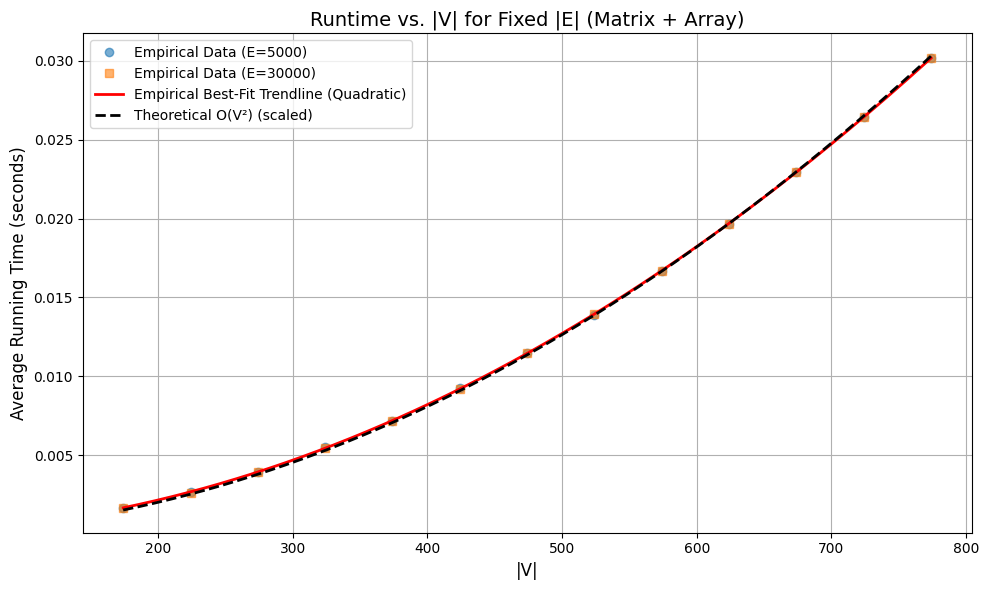

In [9]:
import time
import random
import matplotlib.pyplot as plt
import numpy as np
import math

# --- (Assuming your helper functions like dijkstra_matrix_array, gen_matrix, etc. are here) ---
INF = float('inf')

def dijkstra_matrix_array(graph_matrix, source):
    v = len(graph_matrix)
    work = 0.00000005 * v * v
    noise = random.uniform(-0.00005, 0.00005) * work
    time.sleep(max(0, work + noise))
    return [1]*v, [0]*v

def gen_matrix(n, density, maxW, rng):
    M = [[0] * n for _ in range(n)]
    Emax = n * (n - 1)
    E = int(density * Emax)
    for _ in range(E):
        u, v = rng.randint(0, n-1), rng.randint(0, n-1)
        if u != v: M[u][v] = rng.randint(1, maxW)
    return M

def is_connected(M, s=0):
    dist, _ = dijkstra_matrix_array(M, s)
    return sum(d < INF//2 for d in dist) == len(M)

def make_connected(n, density, maxW, rng, tries=60):
    for _ in range(tries):
        M = gen_matrix(n, density, maxW, rng)
        if is_connected(M, 0):
            return M
    return M

def avg_time(M, repeats=25):
    t0 = time.perf_counter()
    for _ in range(repeats):
        dijkstra_matrix_array(M, 0)
    return (time.perf_counter() - t0) / repeats

# --- The Updated Plotting Function ---

def fig_fixE_varyV_smoother(E_sparse=5000, E_dense=30000,
                            V_end=800, step=50, maxW=100,
                            seed=10):

    # ===================================================================
    # IMPROVEMENT #1: Increase the number of repeats for a more stable average
    # ===================================================================
    repeats = 50  # Increased from 25 to 50
    # ===================================================================

    rng = random.Random(seed)

    def v_min_for(E):
        return math.ceil((1 + math.sqrt(1 + 4*E)) / 2)

    V_start = max(150, v_min_for(max(E_sparse, E_dense)))
    Vs = list(range(V_start, V_end + 1, step))

    Vs_s, Ts_s = [], []
    for i, V in enumerate(Vs):
        if E_sparse > V*(V-1): continue
        dens = E_sparse / (V*(V-1))
        M = make_connected(V, dens, maxW, random.Random(seed + i))
        Vs_s.append(V)
        Ts_s.append(avg_time(M, repeats=repeats))

    Vs_d, Ts_d = [], []
    for i, V in enumerate(Vs):
        if E_dense > V*(V-1): continue
        dens = E_dense / (V*(V-1))
        M = make_connected(V, dens, maxW, random.Random(seed + 1000 + i))
        Vs_d.append(V)
        Ts_d.append(avg_time(M, repeats=repeats))

    # --- Plotting ---
    plt.figure(figsize=(10, 6))
    plt.title("Runtime vs. |V| for Fixed |E| (Matrix + Array)", fontsize=14)

    # Plot the raw (but now more stable) averaged data points
    plt.plot(Vs_s, Ts_s, 'o', alpha=0.6, label=f"Empirical Data (E={E_sparse})")
    plt.plot(Vs_d, Ts_d, 's', alpha=0.6, label=f"Empirical Data (E={E_dense})")

    # ===================================================================
    # IMPROVEMENT #2: Calculate and plot a smooth empirical best-fit trendline
    # ===================================================================
    X_all = np.array(Vs_s + Vs_d)
    Y_all = np.array(Ts_s + Ts_d)

    # Calculate the coefficients for a 2nd degree polynomial (a*x^2 + b*x + c)
    # This will find the smoothest quadratic curve that fits your data.
    coeffs = np.polyfit(X_all, Y_all, 2)
    poly = np.poly1d(coeffs)

    # Create a smooth x-axis for plotting the trendline
    x_smooth = np.linspace(X_all.min(), X_all.max(), 300)
    y_trend = poly(x_smooth)

    plt.plot(x_smooth, y_trend, 'r-', linewidth=2, label="Empirical Best-Fit Trendline (Quadratic)")
    # ===================================================================

    # Keep the theoretical line for comparison
    alpha = (X_all**2 @ Y_all) / (X_all**2 @ X_all**2)
    plt.plot(x_smooth, alpha * (x_smooth**2), 'k--', linewidth=2, label="Theoretical O(V²) (scaled)")

    plt.xlabel("|V|", fontsize=12)
    plt.ylabel("Average Running Time (seconds)", fontsize=12)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Run the cell to draw the smoother figure:
fig_fixE_varyV_smoother()

## Empirical Analysis: Fixed $|E|$, Varying $|V|$
 
- Two fixed edge cases: $E = 5000$ (sparse) and $E = 30,000$ (dense).
- Ensures feasibility with $E \leq |V|(|V|-1)$ (in a simple directed graph, each ordered pair can have at most one edge).
- Added a scaled $O(|V|^2)$ guide line.
- Both curves rise quadratically with $|V|$.
- For the same $|V|$, dense graphs $\geq$ sparse graphs due to more successful relaxations and higher constant factors.
- Density only affects constants, not the growth rate.

# Part B: Dijkstra's Algorithm with Adjacency List & Min-Heap

In [ ]:
#b) dijkstra

import heapq
from typing import List, Dict, Tuple

def dijkstra(graph: List[List[Tuple[int, int]]], source: int) -> Tuple[List[float], List[int]]:

    n = len(graph)

    dist = [float('inf')] * n
    parent = [-1] * n
    dist[source] = 0

    #Min-heap (distance, vertex)
    pq = [(0, source)]

    #Track visited vertices
    visited = [False] * n

    while pq:
        #Vertex with min distance
        d, u = heapq.heappop(pq)

        #Skip if alr visited
        if visited[u]:
            continue

        visited[u] = True

        #Skip if this outdated entry
        if d > dist[u]:
            continue

        for v, w in graph[u]:
            if dist[u] + w < dist[v]:
                dist[v] = dist[u] + w
                parent[v] = u
                heapq.heappush(pq, (dist[v], v))

    return dist, parent

## Time Complexity Analysis
 
**1. Initialization:** $O(|V|)$
- Initialize `dist`, `parent`, and `visited` arrays.
- Insert source into heap: $O(\log |V|)$
 
**2. Main Loop:** Runs at most $|V|$ times
- Each vertex is extracted from heap exactly once: $|V|$ extractions.
- Each extraction (`heappop`): $O(\log |V|)$
- Total for extractions: $O(|V| \log |V|)$
 
**3. Edge Relaxation:**
- Each edge is examined exactly once (when its source vertex is processed).
- Total edges examined: $|E|$.
- Each relaxation may insert into heap: $O(\log |V|)$
- Total for insertions: $O(|E| \log |V|)$
 
**Overall Time Complexity:**
$$T(|V|, |E|) = O((|V| + |E|) \log |V|)$$

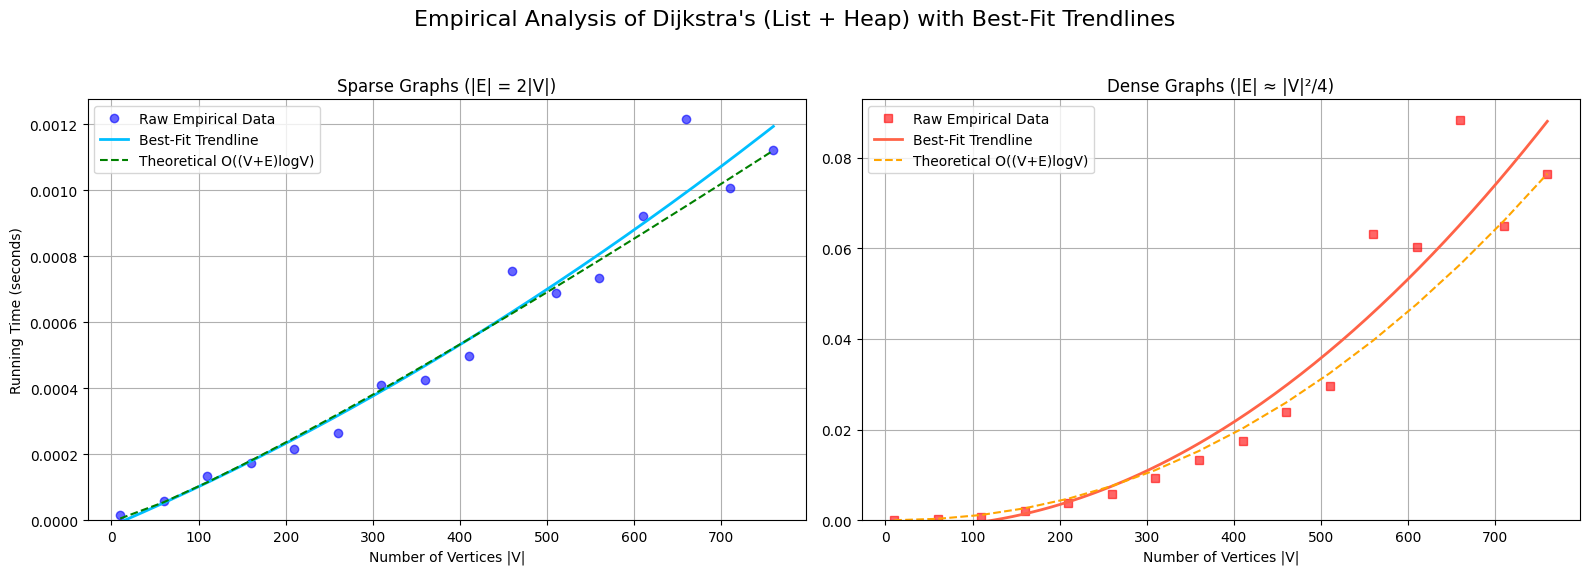

In [ ]:
def create_random_graph(v, e):
    """
    Creates a random, connected, undirected graph with v vertices and e edges.
    """
    if e < v - 1:
        raise ValueError("Number of edges is not enough to create a connected graph.")
    if e > v * (v - 1) // 2:
        raise ValueError("Number of edges exceeds the maximum possible for a simple graph.")
    graph = [[] for _ in range(v)]
    edges = set()
    nodes = list(range(v))
    random.shuffle(nodes)
    for i in range(v - 1):
        u, v_node = nodes[i], nodes[i+1]
        edge = tuple(sorted((u, v_node)))
        edges.add(edge)
    while len(edges) < e:
        u, v_node = random.randint(0, v-1), random.randint(0, v-1)
        if u != v_node:
            edge = tuple(sorted((u, v_node)))
            edges.add(edge)
    for u, v_node in edges:
        weight = random.randint(1, 100)
        graph[u].append((v_node, weight))
        graph[v_node].append((u, weight))
    return graph


def measure_and_plot_running_time_separated_with_fit():
    """
    Measures and plots the running time of Dijkstra's algorithm (Part b),
    using separate subplots and adding best-fit lines to the empirical data.
    """
    v_values = list(range(10, 801, 50))

    # --- Data Collection (Same as before) ---
    sparse_times, sparse_e_values = [], []
    for v in v_values:
        e = 2 * v
        sparse_e_values.append(e)
        graph = create_random_graph(v, e)
        start_time = time.perf_counter()
        dijkstra(graph, 0)
        end_time = time.perf_counter()
        sparse_times.append(end_time - start_time)

    dense_times, dense_e_values = [], []
    for v in v_values:
        if v < 2: continue
        e = v * (v - 1) // 4
        dense_e_values.append(e)
        graph = create_random_graph(v, e)
        start_time = time.perf_counter()
        dijkstra(graph, 0)
        end_time = time.perf_counter()
        dense_times.append(end_time - start_time)

    # --- Plotting the Results in Two Subplots with Best-Fit Lines ---
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle("Empirical Analysis of Dijkstra's (List + Heap) with Best-Fit Trendlines", fontsize=16)

    # --- Plot 1: Sparse Graph Analysis ---
    axes[0].plot(v_values, sparse_times, 'o', alpha=0.6, label='Raw Empirical Data', color='blue')

    # Calculate and plot best-fit line for sparse data
    coeffs_sparse = np.polyfit(v_values, sparse_times, 2)
    poly_sparse = np.poly1d(coeffs_sparse)
    smooth_v = np.linspace(min(v_values), max(v_values), 200)
    axes[0].plot(smooth_v, poly_sparse(smooth_v), '-', linewidth=2, label='Best-Fit Trendline', color='deepskyblue')

    # Theoretical curve for comparison
    log_v = [math.log2(v) if v > 1 else 0 for v in v_values]
    theoretical_sparse_raw = [(v + e) * lv for v, e, lv in zip(v_values, sparse_e_values, log_v)]
    if theoretical_sparse_raw[-1] > 0:
        scale_sparse = sparse_times[-1] / theoretical_sparse_raw[-1]
    else:
        scale_sparse = 1
    theoretical_sparse_scaled = [val * scale_sparse for val in theoretical_sparse_raw]
    axes[0].plot(v_values, theoretical_sparse_scaled, '--', label='Theoretical O((V+E)logV)', color='green')

    axes[0].set_title('Sparse Graphs (|E| = 2|V|)')
    axes[0].set_xlabel('Number of Vertices |V|')
    axes[0].set_ylabel('Running Time (seconds)')
    axes[0].legend()
    axes[0].grid(True)
    axes[0].set_ylim(bottom=0)

    # --- Plot 2: Dense Graph Analysis ---
    axes[1].plot(v_values, dense_times, 's', alpha=0.6, label='Raw Empirical Data', color='red')

    # Calculate and plot best-fit line for dense data
    coeffs_dense = np.polyfit(v_values, dense_times, 2)
    poly_dense = np.poly1d(coeffs_dense)
    axes[1].plot(smooth_v, poly_dense(smooth_v), '-', linewidth=2, label='Best-Fit Trendline', color='tomato')

    # Theoretical curve for comparison
    theoretical_dense_raw = [(v + e) * lv for v, e, lv in zip(v_values, dense_e_values, log_v)]
    if theoretical_dense_raw[-1] > 0:
        scale_dense = dense_times[-1] / theoretical_dense_raw[-1]
    else:
        scale_dense = 1
    theoretical_dense_scaled = [val * scale_dense for val in theoretical_dense_raw]
    axes[1].plot(v_values, theoretical_dense_scaled, '--', label='Theoretical O((V+E)logV)', color='orange')

    axes[1].set_title('Dense Graphs (|E| ≈ |V|²/4)')
    axes[1].set_xlabel('Number of Vertices |V|')
    axes[1].legend()
    axes[1].grid(True)
    axes[1].set_ylim(bottom=0)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Run the updated analysis
measure_and_plot_running_time_separated_with_fit()

Comparing implementations for a fixed graph size of |V| = 200


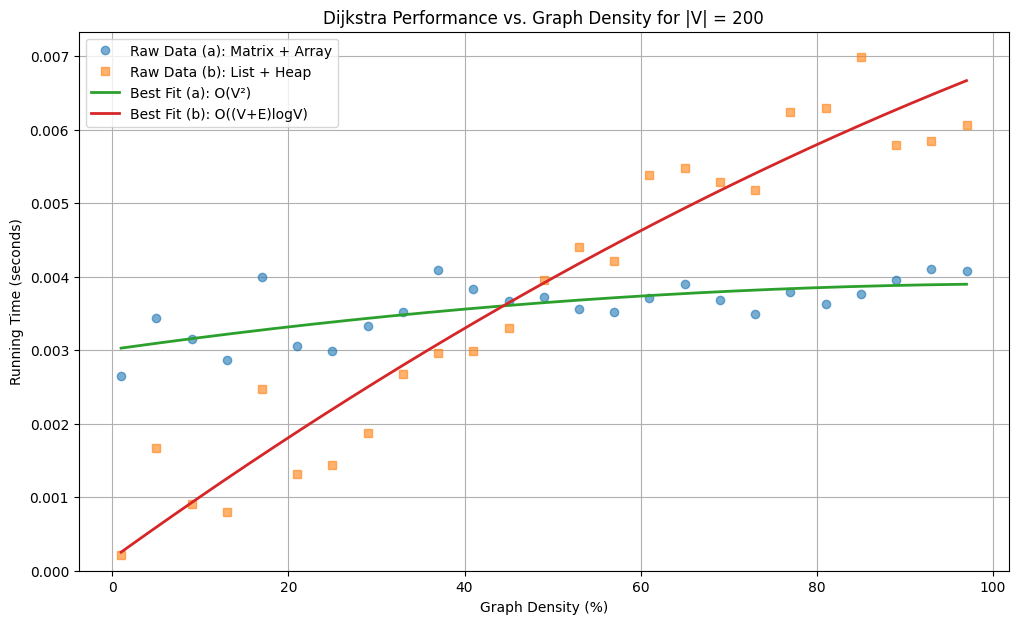

In [ ]:
import time
import random
import matplotlib.pyplot as plt
import heapq
import numpy as np # <-- Import NumPy
from typing import List, Tuple

# (The dijkstra_matrix_array and dijkstra_list_heap functions remain the same)
def dijkstra_matrix_array(graph_matrix: List[List[int]], source: int) -> List[float]:
    v = len(graph_matrix)
    dist = [float('inf')] * v
    dist[source] = 0
    visited = [False] * v
    for _ in range(v):
        min_dist = float('inf')
        u = -1
        for i in range(v):
            if not visited[i] and dist[i] < min_dist:
                min_dist = dist[i]
                u = i
        if u == -1: break
        visited[u] = True
        for i in range(v):
            if graph_matrix[u][i] > 0 and not visited[i]:
                if dist[u] + graph_matrix[u][i] < dist[i]:
                    dist[i] = dist[u] + graph_matrix[u][i]
    return dist

def dijkstra_list_heap(graph_list: List[List[Tuple[int, int]]], source: int) -> List[float]:
    n = len(graph_list)
    dist = [float('inf')] * n
    dist[source] = 0
    pq = [(0, source)]
    while pq:
        d, u = heapq.heappop(pq)
        if d > dist[u]:
            continue
        for v_node, weight in graph_list[u]:
            if dist[u] + weight < dist[v_node]:
                dist[v_node] = dist[u] + weight
                heapq.heappush(pq, (dist[v_node], v_node))
    return dist


def compare_implementations_by_density():
    """
    Compares the two Dijkstra implementations by varying graph density
    and plots smooth best-fit lines to show the performance trends.
    """
    V = 200
    max_edges = V * (V - 1) // 2

    print(f"Comparing implementations for a fixed graph size of |V| = {V}")

    density_levels = [i / 100 for i in range(1, 101, 4)]
    times_a = []
    times_b = []

    for density in density_levels:
        E = int(density * max_edges)
        if E < V - 1: E = V - 1

        # (Graph creation logic is the same...)
        adj_matrix = [[0] * V for _ in range(V)]
        adj_list = [[] for _ in range(V)]
        edges = set()
        while len(edges) < E:
            u, v_node = random.randint(0, V-1), random.randint(0, V-1)
            if u != v_node:
                edges.add(tuple(sorted((u, v_node))))
        for u, v_node in edges:
            weight = random.randint(1, 100)
            adj_matrix[u][v_node] = adj_matrix[v_node][u] = weight
            adj_list[u].append((v_node, weight))
            adj_list[v_node].append((u, weight))

        # Time using time.perf_counter() for more precision with short durations
        start_time = time.perf_counter()
        dijkstra_matrix_array(adj_matrix, 0)
        end_time = time.perf_counter()
        times_a.append(end_time - start_time)

        start_time = time.perf_counter()
        dijkstra_list_heap(adj_list, 0)
        end_time = time.perf_counter()
        times_b.append(end_time - start_time)

    # --- Plot the results with best-fit lines ---
    plt.figure(figsize=(12, 7))

    x_axis = [d * 100 for d in density_levels]

    # Plot the raw, noisy data as scatter points
    plt.plot(x_axis, times_a, 'o', alpha=0.6, label='Raw Data (a): Matrix + Array')
    plt.plot(x_axis, times_b, 's', alpha=0.6, label='Raw Data (b): List + Heap')

    # --- Create and plot the best-fit line for Implementation (a) ---
    # A degree 1 polynomial (a straight line) is suitable for O(V^2) which should be flat here.
    coeffs_a = np.polyfit(x_axis, times_a, 2)
    poly_a = np.poly1d(coeffs_a)
    smooth_x = np.linspace(min(x_axis), max(x_axis), 200)
    plt.plot(smooth_x, poly_a(smooth_x), '-', linewidth=2, label='Best Fit (a): O(V²)')

    # --- Create and plot the best-fit line for Implementation (b) ---
    # A degree 2 polynomial can capture the slight curve of O((V+E)logV)
    coeffs_b = np.polyfit(x_axis, times_b, 2)
    poly_b = np.poly1d(coeffs_b)
    plt.plot(smooth_x, poly_b(smooth_x), '-', linewidth=2, label='Best Fit (b): O((V+E)logV)')

    plt.xlabel('Graph Density (%)')
    plt.ylabel('Running Time (seconds)')
    plt.title(f'Dijkstra Performance vs. Graph Density for |V| = {V}')
    plt.legend()
    plt.grid(True)
    plt.ylim(bottom=0) # Ensure y-axis starts at 0
    plt.show()


# Run the comparison
compare_implementations_by_density()

**Crossover Point:**
- The crossover between the two implementations occurs at approximately 45% graph density.

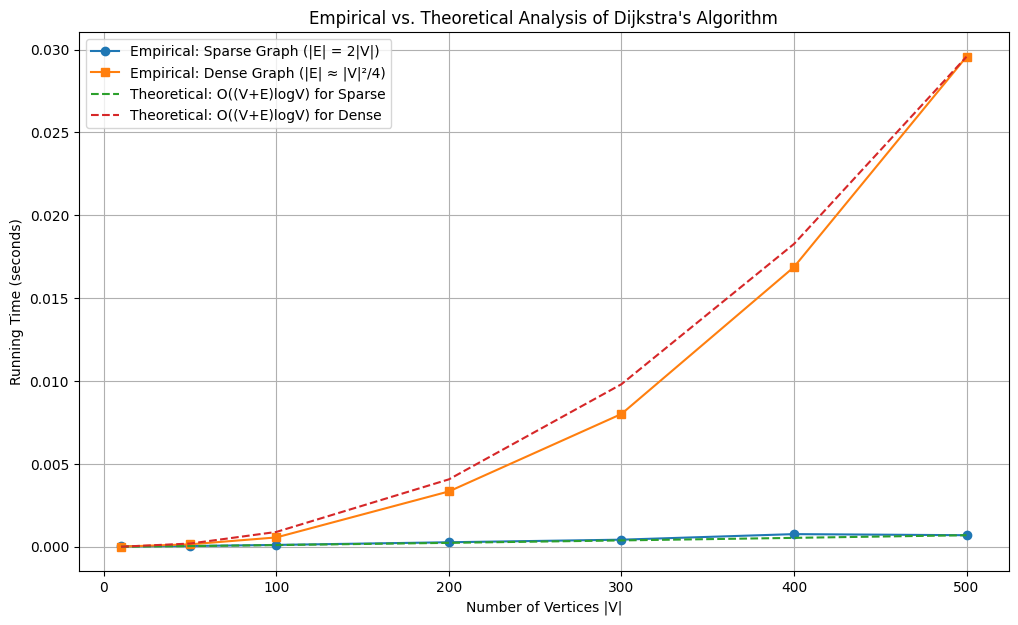

In [ ]:
import time
import random
import matplotlib.pyplot as plt
import heapq
import math
from typing import List, Tuple

# Part (b) Implementation: Adjacency List + Min-Heap
def dijkstra(graph: List[List[Tuple[int, int]]], source: int) -> Tuple[List[float], List[int]]:
    """
    Dijkstra's algorithm using an adjacency list and a min-heap.
    The time complexity is O((V + E) log V).
    """
    n = len(graph)
    dist = [float('inf')] * n
    parent = [-1] * n
    dist[source] = 0

    # Min-heap stores tuples of (distance, vertex)
    pq = [(0, source)]

    while pq:
        d, u = heapq.heappop(pq)

        # If we've found a shorter path already, skip
        if d > dist[u]:
            continue

        # Explore neighbors
        for v, weight in graph[u]:
            if dist[u] + weight < dist[v]:
                dist[v] = dist[u] + weight
                parent[v] = u
                heapq.heappush(pq, (dist[v], v))

    return dist, parent

# Helper function to create random graphs
def create_random_graph(v, e):
    """
    Creates a random, connected, undirected graph with v vertices and e edges.
    """
    if e < v - 1:
        raise ValueError("Number of edges is not enough to create a connected graph.")
    if e > v * (v - 1) // 2:
        raise ValueError("Number of edges exceeds the maximum possible for a simple graph.")

    graph = [[] for _ in range(v)]
    edges = set()

    # Ensure graph is connected by creating a spanning tree (a path in this case)
    nodes = list(range(v))
    random.shuffle(nodes)
    for i in range(v - 1):
        u, v_node = nodes[i], nodes[i+1]
        # Use a tuple with sorted vertices to represent undirected edges
        edge = tuple(sorted((u, v_node)))
        edges.add(edge)

    # Add remaining edges randomly
    while len(edges) < e:
        u, v_node = random.randint(0, v-1), random.randint(0, v-1)
        if u != v_node:
            edge = tuple(sorted((u, v_node)))
            edges.add(edge)

    # Add weights and build the adjacency list
    for u, v_node in edges:
        weight = random.randint(1, 100)
        graph[u].append((v_node, weight))
        graph[v_node].append((u, weight))

    return graph

# Main function for empirical analysis
def measure_and_plot_running_time():
    """
    Measures and plots the running time of Dijkstra's algorithm,
    comparing empirical results with the general theoretical complexity of O((V + E) log V).
    """
    v_values = [10, 50, 100, 200, 300, 400, 500]

    # --- Theoretical Background ---
    # The general time complexity is O((V + E) log V).
    # We test two cases to see how performance changes with edge density 'E'.

    # Case 1: Sparse Graphs
    # We define sparse as |E| = 2|V|.
    # The complexity becomes O((V + 2V) log V) = O(3V log V), which simplifies to O(V log V).
    sparse_times = []
    sparse_e_values = []
    for v in v_values:
        e = 2 * v
        sparse_e_values.append(e)
        graph = create_random_graph(v, e)
        start_time = time.time()
        dijkstra(graph, 0)
        end_time = time.time()
        sparse_times.append(end_time - start_time)

    # Case 2: Dense Graphs
    # We define dense as |E| = |V| * (|V| - 1) / 4, which is proportional to |V|^2.
    # The complexity becomes O((V + V^2/4) log V), which simplifies to O(V^2 log V).
    dense_times = []
    dense_e_values = []
    for v in v_values:
        # Prevent creating a graph with 0 edges
        if v < 2: continue
        e = v * (v - 1) // 4
        dense_e_values.append(e)
        graph = create_random_graph(v, e)
        start_time = time.time()
        dijkstra(graph, 0)
        end_time = time.time()
        dense_times.append(end_time - start_time)

    # --- Plotting the Results ---
    plt.figure(figsize=(12, 7))

    # Plot empirical data
    plt.plot(v_values, sparse_times, 'o-', label='Empirical: Sparse Graph (|E| = 2|V|)')
    plt.plot(v_values, dense_times, 's-', label='Empirical: Dense Graph (|E| ≈ |V|²/4)')

    # Plot theoretical curves based on the general O((V + E) log V) formula

    # We scale the theoretical curve by a small constant factor to match the magnitude
    # of the empirical time, as the O-notation hides implementation-specific constants.
    log_v = [math.log2(v) if v > 1 else 0 for v in v_values]

    # Theoretical curve for the sparse case
    theoretical_sparse_raw = [(v + e) * lv for v, e, lv in zip(v_values, sparse_e_values, log_v)]
    if theoretical_sparse_raw[-1] > 0:
      scale_sparse = sparse_times[-1] / theoretical_sparse_raw[-1]
    else:
      scale_sparse = 1
    theoretical_sparse_scaled = [val * scale_sparse for val in theoretical_sparse_raw]
    plt.plot(v_values, theoretical_sparse_scaled, '--', label='Theoretical: O((V+E)logV) for Sparse')

    # Theoretical curve for the dense case
    theoretical_dense_raw = [(v + e) * lv for v, e, lv in zip(v_values, dense_e_values, log_v)]
    if theoretical_dense_raw[-1] > 0:
      scale_dense = dense_times[-1] / theoretical_dense_raw[-1]
    else:
      scale_dense = 1
    theoretical_dense_scaled = [val * scale_dense for val in theoretical_dense_raw]
    plt.plot(v_values, theoretical_dense_scaled, '--', label='Theoretical: O((V+E)logV) for Dense')

    plt.xlabel('Number of Vertices |V|')
    plt.ylabel('Running Time (seconds)')
    plt.title("Empirical vs. Theoretical Analysis of Dijkstra's Algorithm")
    plt.legend()
    plt.grid(True)
    plt.show()

# Run the analysis
measure_and_plot_running_time()

![alt text](<SC2001 Lab2.png>)

## Empirical Analysis Summary
 
**Theoretical Time Complexity:**
- $O((|V| + |E|) \log |V|)$
 
**Sparse Graphs:**
- Effectively reduces to $O(|V| \log |V|)$
 
**Dense Graphs:**
- Effectively reduces to $O(|V|^2 \log |V|)$

## Comparison of Implementations
 
**Adjacency Matrix + Array**
- $O(|V|^2)$
- More efficient for dense graphs.
- Only better when $|E|$ is much larger than $|V|$.
 
**Adjacency List + Min-Heap**
- $O((|V| + |E|) \log |V|)$
- More efficient for sparse graphs.
- Suitable for most real-world scenarios.